In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
import sys
sys.path.append("..")
from src import SGDRScheduler_custom

Couldn't import dot_parser, loading of dot files will not be possible.


[TrainClass] CWR added as callback


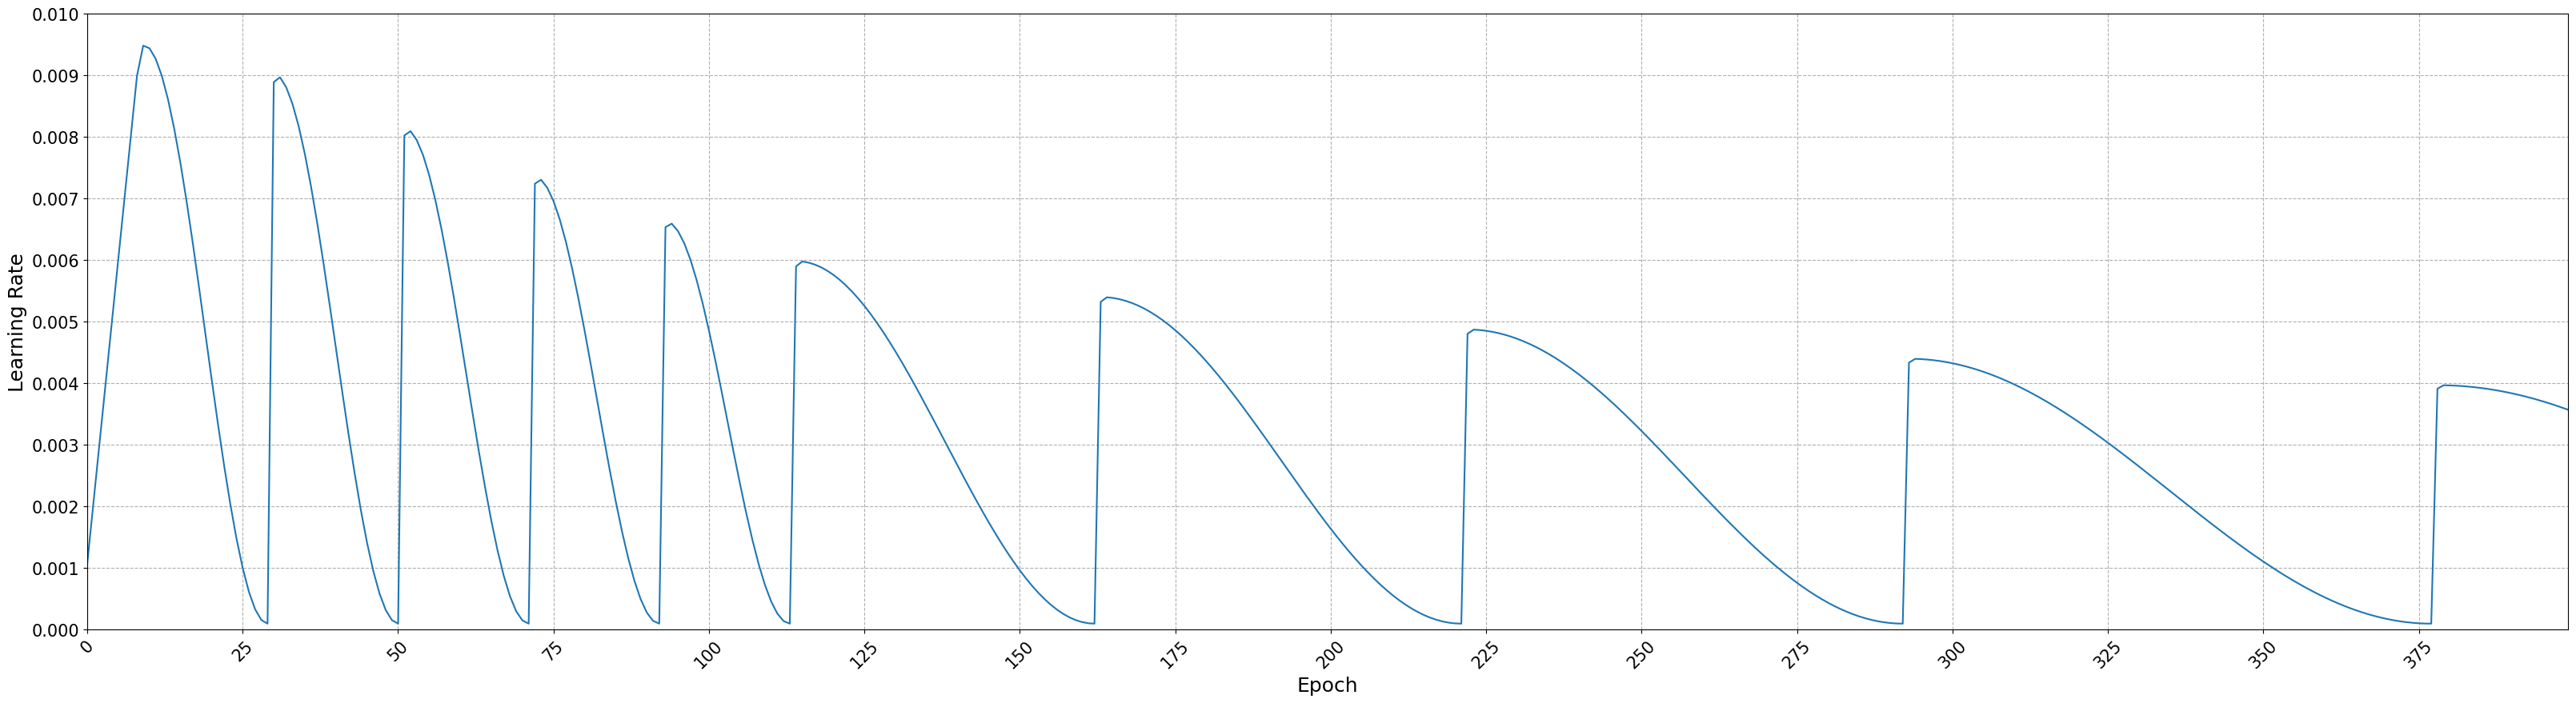

In [2]:
# create a dummy model with an optimizer
model = Sequential()                # this is a placeholder and won't actually be used for training
model.add(Dense(1, input_dim=1))    # add a simple layer just to define an input shape
model.compile(optimizer=Adam())     # the optimizer type doesn't matter here

sgdr = SGDRScheduler_custom(
    min_lr=0.0001, 
    max_lr=0.01, 
    steps_per_epoch=68,
    first_lr_drop_mult=1,
    general_lr_decay=0.95, 
    if_warmup_cooldown_start=0,
    init_cooldown_length=20,
    init_cooldown_mult_factor=1,
    warmup_length=10,
    warmup_mult_factor=1,
    if_no_post_warmup=0,
    number_of_cooldowns_before_switch=5,
    new_cooldown_length=40,
    new_cooldown_mult_factor=1.2,
    )

sgdr.set_model(model)  # attach the dummy model to the scheduler

# simulate epochs
num_epochs = 400
learning_rates = []

for epoch in range(num_epochs):
    # simulate steps_per_epoch batches
    for _ in range(sgdr.steps_per_epoch):
        sgdr.on_batch_end(None)
    learning_rates.append(K.get_value(sgdr.model.optimizer.lr))
    sgdr.on_epoch_end(epoch)

# plot the learning rate schedule
fig = plt.figure(figsize=(num_epochs/10, 10))
plt.plot(np.arange(num_epochs), learning_rates)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Learning Rate', fontsize=18)
plt.xticks(np.arange(0, num_epochs, 25), np.arange(0, num_epochs, 25), fontsize=15, rotation=45)
plt.yticks(np.arange(0, 0.011, 0.001), fontsize=15)
plt.ylim(0, 0.01)
plt.margins(0)
plt.grid(which='major', axis='both', linestyle='--')
plt.savefig('LRS_3.png', dpi=300, bbox_inches='tight')

K.clear_session()

del model, sgdr, learning_rates, num_epochs, epoch